In [611]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [612]:
# path = "E:/Sem5/ML/Dataset/preprocessed.csv"
#path2 = "/content/drive/MyDrive/Dataset/stop_words.txt"

In [613]:
#import nltk
#nltk.download('stopwords')

In [614]:
from nltk.corpus import stopwords
stop_words_set = set(stopwords.words('english'))

In [615]:
preprocessedDF = pd.read_csv('Dataset/preprocessed.csv')

In [616]:
preprocessedDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37210 entries, 0 to 37209
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  37210 non-null  bool   
 1   belongs_to_collection  3918 non-null   object 
 2   budget                 37210 non-null  int64  
 3   genres                 37210 non-null  object 
 4   homepage               6307 non-null   object 
 5   id                     37210 non-null  int64  
 6   imdb_id                37210 non-null  int64  
 7   original_language      37205 non-null  object 
 8   original_title         37210 non-null  object 
 9   overview               36573 non-null  object 
 10  popularity             37210 non-null  float64
 11  poster_path            37210 non-null  object 
 12  production_companies   37210 non-null  object 
 13  production_countries   37210 non-null  object 
 14  release_date           37189 non-null  object 
 15  re

In [617]:
preprocessedDF.describe()

,budget,id,imdb_id,popularity,revenue,runtime,vote_average,vote_count,IMDB Score,num_faces,...,hue,brightness_sd,saturation_sd,hue_sd,blue,blue_sd,green,green_sd,red,red_sd
count,3.721000e+04,37210.000000,3.721000e+04,37210.000000,3.721000e+04,37062.000000,37210.000000,37210.000000,37193.000000,37210.000000,...,37210.000000,37210.000000,37210.000000,37210.000000,37210.000000,37210.000000,37210.000000,37210.000000,37210.000000,37210.000000
mean,4.711716e+06,92095.604327,8.350883e+05,3.114066,1.252765e+07,96.065242,5.717186,123.099973,6.409185,0.563612,...,54.121472,72.888216,66.108829,44.692045,102.676043,69.147140,112.402166,72.107912,127.214442,75.265465
std,1.820269e+07,97166.149197,1.144543e+06,5.596429,6.719505e+07,37.338853,1.796600,518.225290,1.142621,0.922337,...,28.890712,15.745163,19.977247,16.171165,49.732066,18.623296,48.762495,16.121290,51.192335,15.793882
min,0.000000e+00,2.000000,3.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.200000,0.000000,...,0.000000,1.183370,0.000000,0.000000,0.882752,1.977672,0.726561,1.651825,1.337270,1.244778
25%,0.000000e+00,22969.250000,8.093450e+04,0.453325,0.000000e+00,86.000000,5.100000,4.000000,5.800000,0.000000,...,30.549816,62.818346,53.854725,34.489826,63.103481,56.652542,73.914467,61.786961,87.503894,65.441396
50%,0.000000e+00,51789.000000,2.363165e+05,1.290035,0.000000e+00,95.000000,6.000000,11.000000,6.600000,0.000000,...,50.157406,73.247646,66.716290,45.677917,98.034244,69.919507,110.593031,72.334171,127.259378,75.881237
75%,0.000000e+00,125163.250000,1.327770e+06,4.358514,0.000000e+00,108.000000,6.800000,42.000000,7.200000,1.000000,...,74.505922,83.473024,79.505317,55.664458,139.488232,82.423853,149.611802,82.938145,167.770281,86.003713
max,3.800000e+08,469172.000000,6.098922e+06,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,9.500000,16.000000,...,174.309900,125.836770,125.016174,88.502696,253.928587,125.838671,251.624791,125.841819,253.605869,125.837170


In [618]:
all_data = preprocessedDF

In [619]:
all_data = all_data.drop(columns=['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'popularity', 'poster_path', 'revenue', 
                                  'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count', 'posterID', 'Imdb Link', 'Title', 'Poster'], axis=1)

In [620]:
all_data.shape

(37210, 25)

In [621]:
all_data = all_data.dropna()

In [622]:
all_data.shape

(36435, 25)

In [623]:
all_data.head()

,original_language,original_title,overview,production_companies,production_countries,release_date,runtime,cast,crew,keywords,...,hue,brightness_sd,saturation_sd,hue_sd,blue,blue_sd,green,green_sd,red,red_sd
0,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,81.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",...,82.805137,58.496526,80.933495,46.984021,147.046133,83.046441,127.812661,59.618615,79.571854,88.574055
1,en,Jumanji,When siblings Judy and Peter discover an encha...,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,104.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1...",...,65.296239,83.413251,67.319422,61.296055,132.472598,84.508776,137.041430,79.140584,137.619493,85.319415
2,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,101.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392...",...,48.908106,94.073346,70.979805,65.406756,97.464385,78.935691,106.743824,89.725921,136.728580,96.124722
3,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,127.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':...",...,43.298337,71.637853,74.316934,57.431210,148.388970,88.371216,161.866089,82.379306,191.924122,72.849543
4,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,106.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...",...,19.093691,102.482222,85.251258,28.312941,94.287052,98.054007,110.440328,99.236678,136.537094,104.796367


In [624]:
def graph_create_dictionary_overview(messages, min_count, tokenizer):
    #stop_words = []
    #with open(path2,'r') as f:
    #  for x in f:
    #    stop_words.append(x[:-1])

    words_count = {}
    for i in tqdm(range(len(messages))):
        s = messages[i]
        words = get_words(s, tokenizer)
        words_unique = list(dict.fromkeys(words))
        for w in words_unique:
          if (len(w)<=1) or (w.lower() in stop_words_set) or (not w.isalpha()):
            continue
          if w.lower() not in words_count:
            words_count[w.lower()] = 1
          else:
            words_count[w.lower()] += 1

    for word in list(words_count.keys()):
        if (words_count[word] < min_count) or word=='':
            del words_count[word]

    return words_count

In [625]:
#tokenizer = spacy.load("en_core_web_sm", disable=["tagger", "parser", "ner", "lemmatizer"])
#graph_overview_dictionary = graph_create_dictionary_overview(
#    all_data['overview'], 75, tokenizer)
#print('Size of dictionary: ', len(graph_overview_dictionary))
# print(overview_dictionary)

In [626]:
#from wordcloud import WordCloud
#wordcloud = WordCloud()
#wordcloud.generate_from_frequencies(frequencies=graph_overview_dictionary)
#plt.figure(figsize=(15,15))
#plt.imshow(wordcloud)
#plt.axis("off")
#plt.show()

In [627]:
#all_data = all_data[all_data.original_language == 'en']
print(all_data.shape)

(36435, 25)


In [628]:
original_language_series = all_data['original_language']
print(len(original_language_series))
original_language_series = original_language_series.drop_duplicates()

36435


In [629]:
len(original_language_series)

87

In [630]:
def create_original_languages_dictionary(ss):
  ol_dict = {}
  idx = 1
  for x in ss:
    ol_dict[x] = idx
    idx+=1
  return ol_dict

In [631]:
original_language_dictionary = create_original_languages_dictionary(original_language_series)

In [632]:
for itr in all_data.index:
  all_data.at[itr, 'original_language'] = original_language_dictionary[all_data.at[itr, 'original_language']]

In [633]:
pd.to_datetime(all_data.release_date)
all_data['year'] = pd.DatetimeIndex(all_data['release_date']).year
all_data = all_data.drop(columns=['release_date'], axis=1)
print(all_data.shape)

(36435, 25)


In [634]:
#change value based on EDA
#all_data = all_data.loc[all_data.year > 1960]

In [635]:
#score_by_genre = all_data.groupby(['Genre'])['IMDB Score'].agg(['mean', 'count']).sort_values(by='mean')
#score_by_genre[score_by_genre['count'] > 0]

In [636]:
from ast import literal_eval

In [637]:
def get_production_companies(l):
  if isinstance(l, list):
    productionCompanies = [pc['name'] for pc in l]
    return '|'.join(productionCompanies)
  return ''

In [638]:
def get_production_countries(l):
  if isinstance(l, list):
    #productionCountries = [pc['iso_3166_1'] for pc in l]
    #return '|'.join(productionCountries)
    if len(l)>0:
      return l[0]['iso_3166_1']
  return ''

In [639]:
def get_keywords(l):
  if isinstance(l, list):
    # temp = [x.split() for x in l]
      # return temp
    # words = [x['name'] for x in l]
    # print(l)
    # print(words)
    words = [x['name'] for x in l]
    allWords = []
    for word in words:
      temp = word.split()
      for t in temp:
        allWords.append(t)
    # print(allWords)
    allWords = set(allWords)
    keyWords = ['keyword-' + w for w in allWords]
    return '|'.join(keyWords)
  return ''

In [640]:
words= [{'id': 154802, 'name': 'silent film'}, {'id': 191047,
                                         'name': 'prison break'}, {'id': 211467, 'name': 'trick film'}]
get_keywords(words)


'keyword-silent|keyword-trick|keyword-film|keyword-prison|keyword-break'

In [641]:
def get_original_title(s):
  if isinstance(s, str):
    s = s.lower()
    temp = s.split()
    temp2 = [x for x in temp if x not in stop_words_set]
    #print(len(temp) - len(temp2))
    title_words = ['title-' + t for t in temp2]
    return '|'.join(title_words)
  return ''

In [642]:
def get_director(l):
  for d in l:
    if d['job'] == 'Director':
      return d['name']
  return ''

def get_actors(l):
    if isinstance(l, list):
        actors = [d['name'] for d in l]
        if len(actors) >= 3:
            actors = actors[:3]
            return '|'.join(actors)
        return '|'.join(actors)


directors = all_data['crew'].apply(literal_eval).apply(get_director)
top_actors = all_data['cast'].apply(literal_eval).apply(get_actors)

In [643]:
production_companies = all_data['production_companies'].apply(literal_eval).apply(get_production_companies)

In [644]:
production_countries = all_data['production_countries'].apply(literal_eval).apply(get_production_countries)

In [645]:
keywords = all_data['keywords'].apply(literal_eval).apply(get_keywords)

In [646]:
original_title = all_data['original_title'].apply(get_original_title)

In [647]:
all_data['director'] = directors


In [648]:
all_data['actors'] = top_actors

In [649]:
all_data['production_companies'] = production_companies

In [650]:
all_data['production_countries'] = production_countries



In [651]:
all_data['keywords'] = keywords



In [652]:
all_data['original_title'] = original_title


In [653]:
all_data.shape

(36435, 27)

In [654]:
print(all_data['runtime'].value_counts())

90.0     2038
100.0    1227
95.0     1142
93.0     1007
96.0      912
         ... 
221.0       1
874.0       1
552.0       1
336.0       1
501.0       1
Name: runtime, Length: 337, dtype: int64


In [655]:
def get_runtime(s):
    if s == 0:
        return np.NaN
    return s

In [656]:
all_data['runtime'] = all_data['runtime'].apply(get_runtime)


In [657]:
all_data = all_data.replace(r'^\s*$', np.NaN, regex=True)

In [658]:
all_data = all_data.dropna()

In [659]:
all_data.shape

(21782, 27)

In [660]:
all_data.columns

Index(['original_language', 'original_title', 'overview',
       'production_companies', 'production_countries', 'runtime', 'cast',
       'crew', 'keywords', 'IMDB Score', 'Genre', 'num_faces', 'brightness',
       'saturation', 'hue', 'brightness_sd', 'saturation_sd ', 'hue_sd',
       'blue', 'blue_sd', 'green', 'green_sd', 'red', 'red_sd ', 'year',
       'director', 'actors'],
      dtype='object')

In [661]:
all_data.head()

,original_language,original_title,overview,production_companies,production_countries,runtime,cast,crew,keywords,IMDB Score,...,hue_sd,blue,blue_sd,green,green_sd,red,red_sd,year,director,actors
0,1,title-toy|title-story,"Led by Woody, Andy's toys live happily in his ...",Pixar Animation Studios,US,81.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",keyword-to|keyword-rivalry|keyword-boy|keyword...,8.3,...,46.984021,147.046133,83.046441,127.812661,59.618615,79.571854,88.574055,1995,John Lasseter,Tom Hanks|Tim Allen|Don Rickles
1,1,title-jumanji,When siblings Judy and Peter discover an encha...,TriStar Pictures|Teitler Film|Interscope Commu...,US,104.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",keyword-board|keyword-book|keyword-disappearan...,6.9,...,61.296055,132.472598,84.508776,137.041430,79.140584,137.619493,85.319415,1995,Joe Johnston,Robin Williams|Jonathan Hyde|Kirsten Dunst
2,1,title-grumpier|title-old|title-men,A family wedding reignites the ancient feud be...,Warner Bros.|Lancaster Gate,US,101.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",keyword-fishing|keyword-duringcreditsstinger|k...,6.6,...,65.406756,97.464385,78.935691,106.743824,89.725921,136.728580,96.124722,1995,Howard Deutch,Walter Matthau|Jack Lemmon|Ann-Margret
3,1,title-waiting|title-exhale,"Cheated on, mistreated and stepped on, the wom...",Twentieth Century Fox Film Corporation,US,127.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",keyword-single|keyword-on|keyword-novel|keywor...,5.7,...,57.431210,148.388970,88.371216,161.866089,82.379306,191.924122,72.849543,1995,Forest Whitaker,Whitney Houston|Angela Bassett|Loretta Devine
4,1,title-father|title-bride|title-part|title-ii,Just when George Banks has recovered from his ...,Sandollar Productions|Touchstone Pictures,US,106.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",keyword-midlife|keyword-daughter|keyword-baby|...,5.9,...,28.312941,94.287052,98.054007,110.440328,99.236678,136.537094,104.796367,1995,Charles Shyer,Steve Martin|Diane Keaton|Martin Short


In [662]:
cols = ['original_language', 'original_title', 'overview',
       'production_companies', 'production_countries', 'runtime', 'cast',
       'crew', 'keywords', 'IMDB Score', 'Genre',
       'num_faces', 'brightness', 'saturation', 'hue',
       'brightness_sd', 'saturation_sd ', 'hue_sd', 'blue', 'blue_sd', 'green',
       'green_sd', 'red', 'red_sd ', 'year', 'director', 'actors']

new_cols = ['data_original_language', 'data_original_title', 'data_overview',
            'data_production_companies', 'data_production_countries', 'data_runtime', 'data_cast',
            'data_crew', 'data_keywords', 'data_IMDBscore', 'data_genre',
       'data_num_faces', 'data_brightness', 'data_saturation', 'data_hue',
       'data_brightness_sd', 'data_saturation_sd', 'data_hue_sd', 'data_blue', 'data_blue_sd', 'data_green',
       'data_green_sd', 'data_red', 'data_red_sd', 'data_year', 'data_director', 'data_actors']


In [663]:
all_data = all_data[cols]
all_data = all_data.dropna()
print(all_data.shape)

(21782, 27)


In [664]:
all_data.columns = new_cols
all_data = all_data.reset_index(drop=True)
print(all_data.shape)

(21782, 27)


In [665]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21782 entries, 0 to 21781
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   data_original_language     21782 non-null  int64  
 1   data_original_title        21782 non-null  object 
 2   data_overview              21782 non-null  object 
 3   data_production_companies  21782 non-null  object 
 4   data_production_countries  21782 non-null  object 
 5   data_runtime               21782 non-null  float64
 6   data_cast                  21782 non-null  object 
 7   data_crew                  21782 non-null  object 
 8   data_keywords              21782 non-null  object 
 9   data_IMDBscore             21782 non-null  float64
 10  data_genre                 21782 non-null  object 
 11  data_num_faces             21782 non-null  float64
 12  data_brightness            21782 non-null  float64
 13  data_saturation            21782 non-null  flo

In [666]:
from sklearn.model_selection import train_test_split

In [667]:
train_dataset, test_dataset = train_test_split(
    all_data, test_size=0.3, random_state=0)
valid_dataset, test_dataset = train_test_split(
    test_dataset, test_size=0.5, random_state=0)

train_data = train_dataset.reset_index(drop=True)
valid_data = valid_dataset.reset_index(drop=True)
test_data = test_dataset.reset_index(drop=True)

print(train_data.shape)
print(valid_data.shape)
print(test_data.shape)

# not making the csv files rightnow
# train_data.to_csv('Dataset/train.csv', index=False)
# valid_data.to_csv('Dataset/valid.csv', index=False)
# test_data.to_csv('Dataset/test.csv', index=False)

print('')
print(np.cov(train_data['data_IMDBscore']))
print(np.cov(valid_data['data_IMDBscore']))
print(np.cov(test_data['data_IMDBscore']))


(15247, 27)
(3267, 27)
(3268, 27)

1.1913959846691164
1.2298575766760365
1.1840317748532385


In [668]:
def get_words(message, tokenizer = None):
    if tokenizer:
        doc = tokenizer(message)
        return [i.text for i in doc]
    else:
        return message.lower().split('|')

def create_dictionary(messages, min_count = 5, tokenizer = None):
    words_count = {}
    for i in tqdm(range(len(messages))):
        s = messages[i]
        words = get_words(s, tokenizer)
        words_unique = list(dict.fromkeys(words))
        for w in words_unique:
            if w not in words_count:
                words_count[w] = 1
            else:
                words_count[w] += 1

    for word in list(words_count.keys()):
        if (words_count[word] < min_count) or word=='':
            del words_count[word]

    index = 1
    for word in list(words_count.keys()):
        words_count[word] = index
        index = index + 1

    return words_count


def transform_text(messages, word_dictionary, tokenizer = None):
    words_arr = np.zeros((len(messages), len(word_dictionary)))
    for i in range(words_arr.shape[0]):
        message_words = get_words(messages[i], tokenizer)
        message_indices = map(word_dictionary.get, message_words)
        for j in message_indices:
            if j is not None:
                words_arr[i, j-1] += 1
    return words_arr

In [669]:
production_companies_dictionary = create_dictionary(
    train_data['data_production_companies'].astype(str).values, min_count=10)
print('Size of dictionary: ', len(production_companies_dictionary))
train_production_companies_matrix = transform_text(
    train_data['data_production_companies'].astype(str).values, production_companies_dictionary)
valid_production_companies_matrix = transform_text(
    valid_data['data_production_companies'].astype(str).values, production_companies_dictionary)
test_production_companies_matrix = transform_text(
    test_data['data_production_companies'].astype(str).values, production_companies_dictionary)
# print(director_dictionary)
print(train_production_companies_matrix.shape)
print(valid_production_companies_matrix.shape)
print(test_production_companies_matrix.shape)


100%|██████████| 15247/15247 [00:00<00:00, 190654.16it/s]

Size of dictionary:  421


(15247, 421)
(3267, 421)
(3268, 421)


In [670]:
production_countries_dictionary = create_dictionary(
    train_data['data_production_countries'].astype(str).values, min_count=0)
print('Size of dictionary: ', len(production_countries_dictionary))
# train_production_countries_matrix = transform_text(train_data['production_countries'].astype(str).values, production_countries_dictionary)
# valid_production_countries_matrix = transform_text(valid_data['production_countries'].astype(str).values, production_countries_dictionary)
# test_production_countries_matrix = transform_text(test_data['production_countries'].astype(str).values, production_countries_dictionary)
# # print(director_dictionary)
# print(train_production_countries_matrix.shape)
# print(valid_production_countries_matrix.shape)
# print(test_production_countries_matrix.shape)


100%|██████████| 15247/15247 [00:00<00:00, 206198.98it/s]

Size of dictionary:  121


In [671]:
def giveCountry(country):
    return production_countries_dictionary.get(country.lower(), 0)

In [672]:
all_data['data_production_countries'] = all_data['data_production_countries'].apply(
    giveCountry)


In [673]:
train_data['data_production_countries'] = train_data['data_production_countries'].apply(
    giveCountry)
valid_data['data_production_countries'] = valid_data['data_production_countries'].apply(
    giveCountry)
test_data['data_production_countries'] = test_data['data_production_countries'].apply(
    giveCountry)

In [674]:
all_data['data_production_countries'].value_counts()


2      11956
9       1851
14      1311
12       793
4        749
       ...  
105        1
121        1
74         1
91         1
111        1
Name: data_production_countries, Length: 122, dtype: int64

In [675]:
keywords_dictionary = create_dictionary(
    train_data['data_keywords'].astype(str).values, min_count=20)
print('Size of dictionary: ', len(keywords_dictionary))
train_keywords_matrix = transform_text(train_data['data_keywords'].astype(str).values, keywords_dictionary)
valid_keywords_matrix = transform_text(valid_data['data_keywords'].astype(str).values, keywords_dictionary)
test_keywords_matrix = transform_text(test_data['data_keywords'].astype(str).values, keywords_dictionary)
# print(director_dictionary)
print(train_keywords_matrix.shape)
print(valid_keywords_matrix.shape)
print(test_keywords_matrix.shape)


100%|██████████| 15247/15247 [00:00<00:00, 98057.05it/s]


Size of dictionary:  1205
(15247, 1205)
(3267, 1205)
(3268, 1205)


In [676]:
original_title_dictionary = create_dictionary(train_data['data_original_title'].astype(str).values, min_count=10)
print('Size of dictionary: ', len(original_title_dictionary))
train_original_title_matrix = transform_text(train_data['data_original_title'].astype(str).values, original_title_dictionary)
valid_original_title_matrix = transform_text(valid_data['data_original_title'].astype(str).values, original_title_dictionary)
test_original_title_matrix = transform_text(test_data['data_original_title'].astype(str).values, original_title_dictionary)
# print(director_dictionary)
print(train_original_title_matrix.shape)
print(valid_original_title_matrix.shape)
print(test_original_title_matrix.shape)

100%|██████████| 15247/15247 [00:00<00:00, 127028.93it/s]

Size of dictionary:  462


(15247, 462)
(3267, 462)
(3268, 462)


In [677]:
# min count is denoting the minimum number of times a word has to appear in the corpus to be included in the dictionary
genre_dictionary = create_dictionary(
    train_data['data_genre'].astype(str).values, min_count=0)


100%|██████████| 15247/15247 [00:00<00:00, 212973.99it/s]


In [678]:
print(genre_dictionary)

{'action': 1, 'adventure': 2, 'history': 3, 'comedy': 4, 'drama': 5, 'romance': 6, 'animation': 7, 'fantasy': 8, 'crime': 9, 'film-noir': 10, 'music': 11, 'horror': 12, 'sci-fi': 13, 'war': 14, 'family': 15, 'thriller': 16, 'mystery': 17, 'biography': 18, 'sport': 19, 'documentary': 20, 'musical': 21, 'short': 22, 'western': 23, 'news': 24, 'adult': 25, 'talk-show': 26}


In [679]:
train_genre_matrix = transform_text(
    train_data['data_genre'].astype(str).values, genre_dictionary)
valid_genre_matrix = transform_text(
    valid_data['data_genre'].astype(str).values, genre_dictionary)
test_genre_matrix = transform_text(
    test_data['data_genre'].astype(str).values, genre_dictionary)
# print(genre_dictionary)
print(train_genre_matrix.shape)
print(valid_genre_matrix.shape)
print(test_genre_matrix.shape)


(15247, 26)
(3267, 26)
(3268, 26)


In [680]:
train_data.head()

,data_original_language,data_original_title,data_overview,data_production_companies,data_production_countries,data_runtime,data_cast,data_crew,data_keywords,data_IMDBscore,...,data_hue_sd,data_blue,data_blue_sd,data_green,data_green_sd,data_red,data_red_sd,data_year,data_director,data_actors
0,3,title-è±é,One man defeated three assassins who sought to...,Beijing New Picture Film Co. Ltd.|China Film C...,1,99.0,"[{'cast_id': 6, 'character': 'Nameless', 'cred...","[{'credit_id': '52fe4214c3a36847f8002709', 'de...",keyword-justice|keyword-patriot|keyword-loss|k...,7.9,...,13.950105,51.188813,49.365128,83.383093,63.672980,105.430261,72.856059,2002,Zhang Yimou,Jet Li|Tony Leung Chiu-Wai|Maggie Cheung
1,1,title-max|title-dugan|title-returns,An English teacher and struggling single mothe...,Twentieth Century Fox Film Corporation,2,98.0,"[{'cast_id': 9, 'character': 'Nora McPhae', 'c...","[{'credit_id': '52fe4316c3a36847f803922d', 'de...",keyword-daughter|keyword-academy|keyword-polic...,6.6,...,41.203618,98.128224,73.880294,103.018587,76.877275,105.217352,86.377101,1983,Herbert Ross,Marsha Mason|Jason Robards|Charley Lau
2,4,title-il|title-sorpasso,"Roberto, a shy law student in Rome, meets Brun...",Fair Film|Incei Film|Sancro Film,3,105.0,"[{'cast_id': 1001, 'character': 'Bruno Cortona...","[{'credit_id': '53c72d58c3a3686260002d4f', 'de...",keyword-drive|keyword-seaside|keyword-summer,8.2,...,12.036510,185.642406,62.850214,201.861522,48.922963,206.574635,51.162120,1962,Dino Risi,Vittorio Gassman|Catherine Spaak|Jean-Louis Tr...
3,7,title-barfuã,"A hedonistic bachelor, falls for an escaped me...",Touchstone Pictures,4,110.0,"[{'cast_id': 19, 'character': 'Nick Keller', '...","[{'credit_id': '52fe4444c3a36847f808c1a1', 'de...",keyword-mental|keyword-road|keyword-movie|keyw...,7.2,...,50.298361,129.331702,84.464875,140.016154,86.789085,159.176815,84.819024,2005,Til Schweiger,Til Schweiger|Johanna Wokalek|Nadja Tiller
4,1,title-beavis|title-butt-head|title-america,"Mike Judge's slacker duo, Beavis and Butt-Head...",Paramount Pictures|Geffen Pictures|MTV Films,2,81.0,"[{'cast_id': 11, 'character': 'Beavis / Butt-H...","[{'credit_id': '52fe438dc3a36847f805ced1', 'de...",keyword-swat|keyword-las|keyword-vegas|keyword...,6.8,...,50.944397,129.680769,87.555827,167.373126,65.905401,188.885057,69.955944,1996,Mike Judge,Mike Judge|Bruce Willis|Demi Moore


In [681]:
director_dictionary = create_dictionary(
    train_data['data_director'].astype(str).values, min_count=10)
print('Size of dictionary: ', len(director_dictionary))
train_director_matrix = transform_text(
    train_data['data_director'].astype(str).values, director_dictionary)
valid_director_matrix = transform_text(
    valid_data['data_director'].astype(str).values, director_dictionary)
test_director_matrix = transform_text(
    test_data['data_director'].astype(str).values, director_dictionary)
# print(director_dictionary)
print(train_director_matrix.shape)
print(valid_director_matrix.shape)
print(test_director_matrix.shape)


100%|██████████| 15247/15247 [00:00<00:00, 271927.51it/s]

Size of dictionary:  206
(15247, 206)
(3267, 206)
(3268, 206)


In [682]:
actors_dictionary = create_dictionary(
    train_data['data_actors'].astype(str).values, min_count=20)
print('Size of dictionary: ', len(actors_dictionary))
train_actors_matrix = transform_text(
    train_data['data_actors'].astype(str).values, actors_dictionary)
valid_actors_matrix = transform_text(
    valid_data['data_actors'].astype(str).values, actors_dictionary)
test_actors_matrix = transform_text(
    test_data['data_actors'].astype(str).values, actors_dictionary)
# print(actors_dictionary)
print(train_actors_matrix.shape)
print(valid_actors_matrix.shape)
print(test_actors_matrix.shape)


100%|██████████| 15247/15247 [00:00<00:00, 183109.81it/s]

Size of dictionary:  177


(15247, 177)
(3267, 177)
(3268, 177)


In [683]:
import spacy
import re

In [684]:
#def func(messages, word_dictionary, tokenizer = None):
#  m_w = get_words_new(messages[0],tokenizer)
#  m_i = map(word_dictionary.get,m_w)
#  print(m_w)
#  print(list(m_i))

In [685]:
def create_dictionary_overview(messages, min_count, tokenizer):
    #stop_words = []
    #with open(path2,'r') as f:
    #  for x in f:
    #    stop_words.append(x[:-1])

    words_count = {}
    for i in tqdm(range(len(messages))):
        s = messages[i]
        words = get_words(s, tokenizer)
        words_unique = list(dict.fromkeys(words))
        for w in words_unique:
          if len(w)<=1 or w.lower() in stop_words_set or not w.isalpha():
            continue
          if w.lower() not in words_count:
            words_count[w.lower()] = 1
          else:
            words_count[w.lower()] += 1

    for word in list(words_count.keys()):
        if (words_count[word] < min_count) or word=='':
            del words_count[word]

    index = 1
    for word in list(words_count.keys()):
        words_count[word] = index
        index = index + 1

    return words_count

In [686]:
def get_words_new(message, tokenizer = None):
  if tokenizer:
    doc = tokenizer(message)
    return [i.text for i in doc]
  else:
    return message.lower().split(' ')

In [687]:
def custom_transform(messages, word_dictionary, tokenizer = None):
    words_arr = np.zeros((len(messages), len(word_dictionary)))
    for i in range(words_arr.shape[0]):
        message_words = get_words_new(messages[i], tokenizer)
        message_indices = map(word_dictionary.get, message_words)
        for j in message_indices:
            if j is not None:
                words_arr[i, j-1] += 1
    return words_arr

In [688]:
tokenizer = spacy.load("en_core_web_sm", disable=["tagger", "parser", "ner", "lemmatizer"])
overview_dictionary = create_dictionary_overview(
    train_data['data_overview'], 75, tokenizer)
print('Size of dictionary: ', len(overview_dictionary))

train_overview_matrix = custom_transform(
    train_data['data_overview'].astype(str).values, overview_dictionary)

valid_overview_matrix = custom_transform(
    valid_data['data_overview'].astype(str).values, overview_dictionary)

test_overview_matrix = custom_transform(
    test_data['data_overview'].astype(str).values, overview_dictionary)

# print(overview_dictionary)
print(train_overview_matrix.shape)
print(valid_overview_matrix.shape)
print(test_overview_matrix.shape)


100%|██████████| 15247/15247 [02:48<00:00, 90.69it/s]


Size of dictionary:  1048
(15247, 1048)
(3267, 1048)
(3268, 1048)


In [689]:
train_overview_matrix.shape

(15247, 1048)

In [690]:
train_data.columns

Index(['data_original_language', 'data_original_title', 'data_overview',
       'data_production_companies', 'data_production_countries',
       'data_runtime', 'data_cast', 'data_crew', 'data_keywords',
       'data_IMDBscore', 'data_genre', 'data_num_faces', 'data_brightness',
       'data_saturation', 'data_hue', 'data_brightness_sd',
       'data_saturation_sd', 'data_hue_sd', 'data_blue', 'data_blue_sd',
       'data_green', 'data_green_sd', 'data_red', 'data_red_sd', 'data_year',
       'data_director', 'data_actors'],
      dtype='object')

In [691]:
train_data.loc[0]

data_original_language                                                       3
data_original_title                                               title-è±é
data_overview                One man defeated three assassins who sought to...
data_production_companies    Beijing New Picture Film Co. Ltd.|China Film C...
data_production_countries                                                    1
data_runtime                                                         99.000000
data_cast                    [{'cast_id': 6, 'character': 'Nameless', 'cred...
data_crew                    [{'credit_id': '52fe4214c3a36847f8002709', 'de...
data_keywords                keyword-justice|keyword-patriot|keyword-loss|k...
data_IMDBscore                                                        7.900000
data_genre                                            Action|Adventure|History
data_num_faces                                                        4.000000
data_brightness                                     

In [692]:
#from wordcloud import WordCloud

In [693]:
#wordcloud = WordCloud()
#wordcloud.generate_from_frequencies(frequencies=overview_dictionary)
#plt.figure(figsize=(15,15))
#plt.imshow(wordcloud)
#plt.axis("off")
#plt.show()

# Encoding 

In [694]:
train_data.columns

Index(['data_original_language', 'data_original_title', 'data_overview',
       'data_production_companies', 'data_production_countries',
       'data_runtime', 'data_cast', 'data_crew', 'data_keywords',
       'data_IMDBscore', 'data_genre', 'data_num_faces', 'data_brightness',
       'data_saturation', 'data_hue', 'data_brightness_sd',
       'data_saturation_sd', 'data_hue_sd', 'data_blue', 'data_blue_sd',
       'data_green', 'data_green_sd', 'data_red', 'data_red_sd', 'data_year',
       'data_director', 'data_actors'],
      dtype='object')

In [695]:
# train_data = pd.read_csv('train.csv')
# valid_data = pd.read_csv('valid.csv')
# test_data = pd.read_csv('test.csv')
train_data = train_data.drop(columns = ['data_original_title','data_overview','data_production_companies','data_cast','data_crew','data_keywords','data_genre','data_director', 'data_actors', 'data_blue', 'data_brightness'])
valid_data = valid_data.drop(columns = ['data_original_title','data_overview','data_production_companies','data_cast','data_crew','data_keywords','data_genre','data_director', 'data_actors', 'data_blue', 'data_brightness'])
test_data = test_data.drop(columns = ['data_original_title','data_overview','data_production_companies','data_cast','data_crew','data_keywords','data_genre','data_director', 'data_actors', 'data_blue', 'data_brightness'])
train_data = pd.concat([train_data,
                        pd.DataFrame(train_genre_matrix, columns = genre_dictionary.keys()),
                        pd.DataFrame(train_director_matrix, columns = director_dictionary.keys()), 
                        pd.DataFrame(train_actors_matrix, columns = actors_dictionary.keys()),
                        pd.DataFrame(train_overview_matrix, columns = overview_dictionary.keys()),
                        pd.DataFrame(train_production_companies_matrix, columns = production_companies_dictionary.keys()),
                        pd.DataFrame(train_keywords_matrix, columns=keywords_dictionary.keys()),
                        pd.DataFrame(train_original_title_matrix, columns=original_title_dictionary.keys())],
                        axis=1)

valid_data = pd.concat([valid_data,
                        pd.DataFrame(valid_genre_matrix, columns = genre_dictionary.keys()),
                        pd.DataFrame(valid_director_matrix, columns = director_dictionary.keys()), 
                        pd.DataFrame(valid_actors_matrix, columns = actors_dictionary.keys() ),
                        pd.DataFrame(valid_overview_matrix, columns = overview_dictionary.keys()),
                        pd.DataFrame(valid_production_companies_matrix, columns = production_companies_dictionary.keys()),
                        pd.DataFrame(valid_keywords_matrix, columns=keywords_dictionary.keys()),
                        pd.DataFrame(valid_original_title_matrix, columns=original_title_dictionary.keys())],
                        axis=1)

test_data = pd.concat([test_data,
                       pd.DataFrame(test_genre_matrix, columns = genre_dictionary.keys()),
                       pd.DataFrame(test_director_matrix, columns = director_dictionary.keys()), 
                       pd.DataFrame(test_actors_matrix, columns = actors_dictionary.keys()),
                       pd.DataFrame(test_overview_matrix, columns = overview_dictionary.keys()),
                       pd.DataFrame(test_production_companies_matrix, columns = production_companies_dictionary.keys()),
                       pd.DataFrame(test_keywords_matrix, columns=keywords_dictionary.keys()),
                       pd.DataFrame(test_original_title_matrix, columns=original_title_dictionary.keys())],
                       axis=1)

In [696]:
# train_data.to_csv('train1.csv', index=False)
# valid_data.to_csv('valid1.csv', index=False)
# test_data.to_csv('test1.csv', index=False)

In [697]:
# train_data = pd.read_csv('train1.csv', low_memory=False)
# valid_data = pd.read_csv('valid1.csv', low_memory=False)
# test_data = pd.read_csv('test1.csv', low_memory=False)

In [698]:
train_data.shape, test_data.shape, valid_data.shape

((15247, 3561), (3268, 3561), (3267, 3561))

In [699]:
train_data

,data_original_language,data_production_countries,data_runtime,data_IMDBscore,data_num_faces,data_saturation,data_hue,data_brightness_sd,data_saturation_sd,data_hue_sd,...,title-hunter,title-million,title-talk,title-que,title-dance,title-years,title-valley,title-x,title-alien,title-behind
0,3,1,99.0,7.9,4.0,142.608720,18.089061,72.837943,55.128848,13.950105,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2,98.0,6.6,1.0,54.495943,65.970730,82.609480,41.032412,41.203618,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,3,105.0,8.2,0.0,29.190419,17.475241,50.333288,50.654987,12.036510,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,4,110.0,7.2,2.0,69.769761,43.547813,81.944152,52.782587,50.298361,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,2,81.0,6.8,0.0,106.807613,59.977530,65.657793,85.238509,50.944397,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15242,10,33,245.0,8.2,0.0,147.532563,45.543702,86.081089,78.207534,42.612249,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15243,40,41,97.0,5.8,1.0,92.405335,103.521563,47.450331,45.362335,41.659357,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15244,1,2,86.0,4.5,0.0,61.753628,24.690933,94.821824,64.670065,23.646891,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15245,1,2,98.0,8.2,0.0,104.391648,92.758420,80.547712,73.227213,44.502221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [700]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15247 entries, 0 to 15246
Columns: 3561 entries, data_original_language to title-behind
dtypes: float64(3558), int64(3)
memory usage: 414.2 MB


## normailizing the data

In [702]:
for col in ['data_original_language','data_runtime', 'data_num_faces', 'data_hue', 'data_hue_sd', 'data_saturation', 'data_saturation_sd', 'data_brightness_sd',
            'data_blue_sd', 'data_green', 'data_green_sd', 'data_red', 'data_red_sd', 'data_year', 'data_production_countries']:
    mean_feature = np.mean(train_data[col])
    sd_feature = np.std(train_data[col])
    if sd_feature != 0:
        train_data[col] = (train_data[col] - mean_feature) / sd_feature
        valid_data[col] = (valid_data[col] - mean_feature) / sd_feature
        test_data[col] = (test_data[col] - mean_feature) / sd_feature
    else:
        train_data[col] = (train_data[col] - mean_feature)
        valid_data[col] = (valid_data[col] - mean_feature)
        test_data[col] = (test_data[col] - mean_feature)


In [703]:
print(train_data.shape)
print(valid_data.shape)
print(test_data.shape)
train_X = train_data.drop(columns=['data_IMDBscore'])
valid_X = valid_data.drop(columns=['data_IMDBscore'])
test_X = test_data.drop(columns=['data_IMDBscore'])

(15247, 3561)
(3267, 3561)
(3268, 3561)


# Linear Regression

In [704]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [705]:
print(np.cov(train_data['data_IMDBscore']))
print(np.cov(valid_data['data_IMDBscore']))
print(np.cov(test_data['data_IMDBscore']))


1.1913959846691164
1.2298575766760365
1.1840317748532385


In [706]:
reg = LinearRegression().fit(train_X, train_data['data_IMDBscore'])

print('Train R^2: ', reg.score(train_X, train_data['data_IMDBscore']))
print('Train MSE: ', mean_squared_error(
    reg.predict(train_X), train_data['data_IMDBscore']))

print('Valid R^2: ', reg.score(valid_X, valid_data['data_IMDBscore']))
print('Valid MSE: ', mean_squared_error(
    reg.predict(valid_X), valid_data['data_IMDBscore']))

print('Test R^2: ', reg.score(test_X, test_data['data_IMDBscore']))
print('Test MSE: ', mean_squared_error(
    reg.predict(test_X), test_data['data_IMDBscore']))

Train R^2:  0.5950334342393253
Train MSE:  0.4824438964071153
Valid R^2:  0.34479111185574696
Valid MSE:  0.8055669629209465
Test R^2:  0.34638731803371037
Test MSE:  0.7736613729453473


In [707]:
reg = Ridge(alpha=0.01, random_state=0).fit(train_X, train_data['data_IMDBscore'])

print('Train R^2: ', reg.score(train_X, train_data['data_IMDBscore']))
print('Train MSE: ', mean_squared_error(
    reg.predict(train_X), train_data['data_IMDBscore']))

print('Valid R^2: ', reg.score(valid_X, valid_data['data_IMDBscore']))
print('Valid MSE: ', mean_squared_error(
    reg.predict(valid_X), valid_data['data_IMDBscore']))

print('Test R^2: ', reg.score(test_X, test_data['data_IMDBscore']))
print('Test MSE: ', mean_squared_error(
    reg.predict(test_X), test_data['data_IMDBscore']))


Train R^2:  0.5950861268855235
Train MSE:  0.48238112271740063
Valid R^2:  0.3449421232372779
Valid MSE:  0.8053812972772295
Test R^2:  0.34640263275636496
Test MSE:  0.7736432453757911


In [708]:
reg = Lasso(alpha=0.01, random_state=0).fit(train_X, train_data['data_IMDBscore'])

print('Train R^2: ', reg.score(train_X, train_data['data_IMDBscore']))
print('Train MSE: ', mean_squared_error(
    reg.predict(train_X), train_data['data_IMDBscore']))

print('Valid R^2: ', reg.score(valid_X, valid_data['data_IMDBscore']))
print('Valid MSE: ', mean_squared_error(
    reg.predict(valid_X), valid_data['data_IMDBscore']))

print('Test R^2: ', reg.score(test_X, test_data['data_IMDBscore']))
print('Test MSE: ', mean_squared_error(
    reg.predict(test_X), test_data['data_IMDBscore']))

Train R^2:  0.3154118461369346
Train MSE:  0.815562084152487
Valid R^2:  0.31072546093619036
Valid MSE:  0.8474500378421624
Test R^2:  0.3423711408385005
Test MSE:  0.7784151992534454


In [709]:
from yellowbrick.model_selection import LearningCurve

In [710]:
linReg = LinearRegression()

In [711]:
visualizer = LearningCurve(linReg, scoring='r2', cv=2, n_jobs=2)

In [712]:
train_X.columns

Index(['data_original_language', 'data_production_countries', 'data_runtime',
       'data_num_faces', 'data_saturation', 'data_hue', 'data_brightness_sd',
       'data_saturation_sd', 'data_hue_sd', 'data_blue_sd',
       ...
       'title-hunter', 'title-million', 'title-talk', 'title-que',
       'title-dance', 'title-years', 'title-valley', 'title-x', 'title-alien',
       'title-behind'],
      dtype='object', length=3560)

In [713]:
trainCols = ['data_num_faces', 'data_brightness', 'data_saturation', 'data_hue',
             'data_brightness_sd', 'data_saturation_sd', 'data_hue_sd', 'data_blue',
             'data_blue_sd', 'data_green', 'data_green_sd', 'data_red',
             'data_red_sd']
traincols1 = ['data_original_language',
              'data_production_countries', 'data_runtime', 'data_year']


In [714]:
train_X.shape

(15247, 3560)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

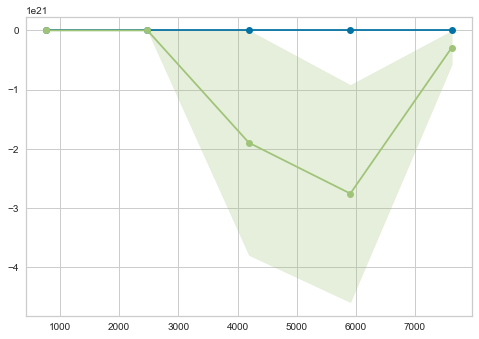

In [715]:
visualizer.fit(train_X, train_data['data_IMDBscore'])

In [ ]:
visualizer.show()

<AxesSubplot:title={'center':'Learning Curve for LinearRegression'}, xlabel='Training Instances', ylabel='Score'>

In [609]:
valid_X.shape

(3267, 3562)

In [610]:
visualizer.fit(valid_X, valid_data['data_IMDBscore'])


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [276]:
for i in train_X.columns:
    print(i)
    print(train_X[i].dtype)

data_original_language
float64
data_production_countries
float64
data_runtime
float64
data_num_faces
float64
data_brightness
float64
data_saturation
float64
data_hue
float64
data_brightness_sd
float64
data_saturation_sd
float64
data_hue_sd
float64
data_blue
float64
data_blue_sd
float64
data_green
float64
data_green_sd
float64
data_red
float64
data_red_sd
float64
data_year
float64
action


AttributeError: 'DataFrame' object has no attribute 'dtype'

In [277]:
train_X['action'].dtype

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [281]:
type(train_X['action'])

pandas.core.frame.DataFrame

In [279]:
type(train_X['data_year'])


pandas.core.series.Series

In [282]:
train_X['data_year'].dtype


dtype('float64')

In [717]:
from sklearn.model_selection import learning_curve

In [719]:
linearRegression = LinearRegression()

In [720]:
train_sizes, train_scores, valid_scores = learning_curve(linearRegression, train_X, train_data['data_IMDBscore'],
                                                        train_sizes=np.linspace(0.1, 1.0, 10), cv=2,
                                                        scoring='r2')


In [721]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


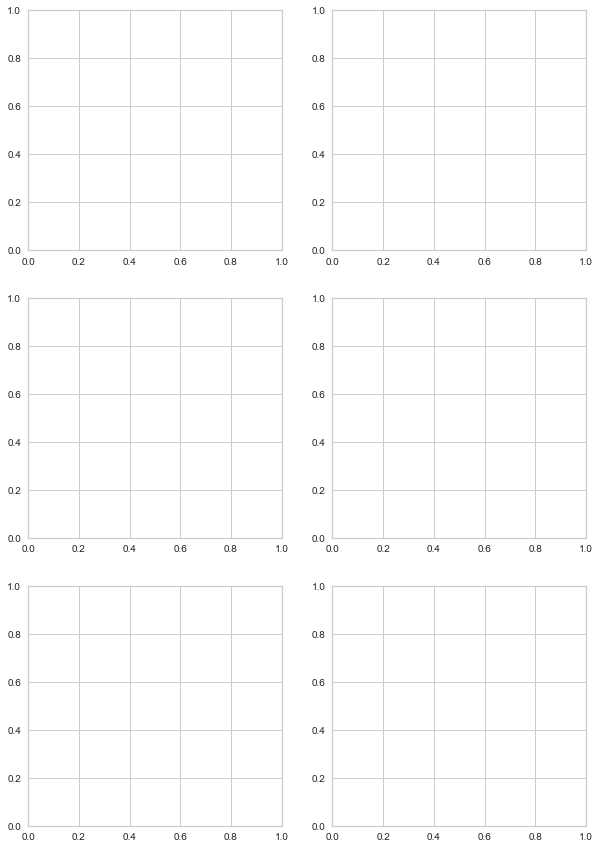

In [722]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/pyplot.py'>

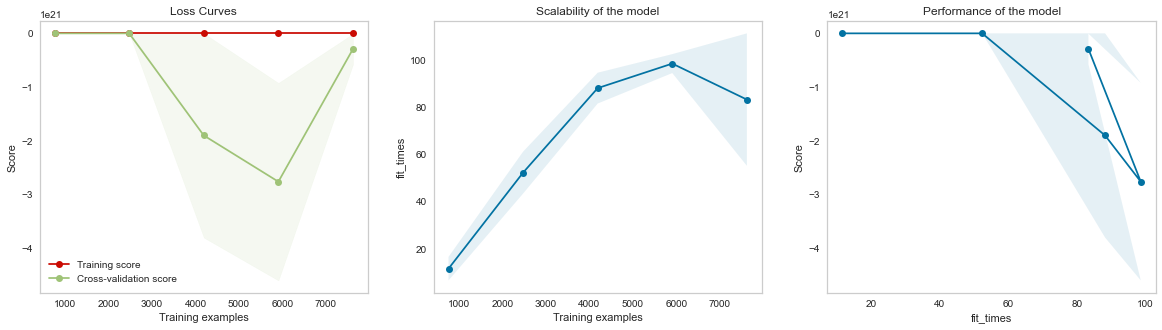

In [726]:
plot_learning_curve(linearRegression, "Loss Curves",
                    train_X, train_data['data_IMDBscore'], cv=2, n_jobs=2)

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/pyplot.py'>

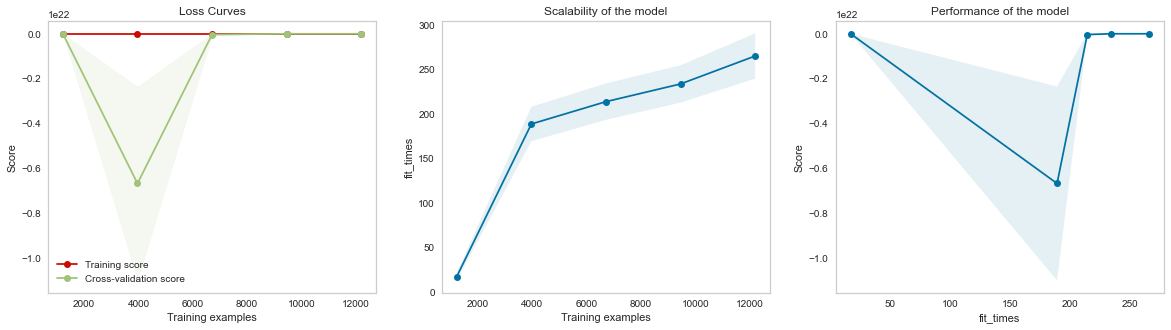

In [727]:
plot_learning_curve(linearRegression, "Loss Curves",
                    train_X, train_data['data_IMDBscore'], cv=5, n_jobs=5)


In [736]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDRegressor
from io import StringIO
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


In [763]:
reg = SGDRegressor(max_iter=1000, alpha=0.001, verbose=1)


In [764]:
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()


In [765]:
y = train_data['data_IMDBscore'].copy()

In [766]:
y

0        7.9
1        6.6
2        8.2
3        7.2
4        6.8
        ... 
15242    8.2
15243    5.8
15244    4.5
15245    8.2
15246    5.0
Name: data_IMDBscore, Length: 15247, dtype: float64

In [767]:
y = y*100

In [769]:
y = y.astype(int)

In [770]:
logisticClassifier.fit(train_X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  79 out of  79 | elapsed:  3.1min finished


SGDClassifier(alpha=0.01, loss='log', verbose=1)

In [771]:
sys.stdout = old_stdout
loss_history = mystdout.getvalue()


In [772]:
lossList = []


In [773]:
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    lossList.append(float(line.split("loss: ")[-1]))


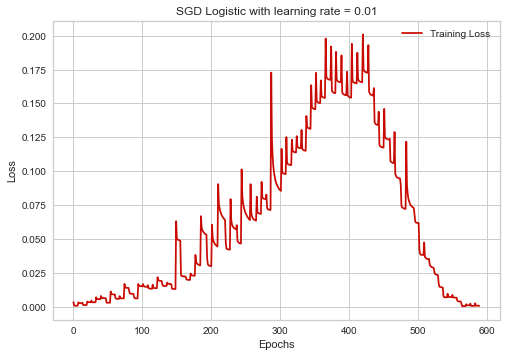

In [774]:
plt.plot(np.arange(len(lossList)), lossList, label='Training Loss', color='r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('SGD Logistic with learning rate = 0.01')
plt.legend()
# plt.savefig('plots/Q2_SGD_Logistic_sklearn.png')
plt.show()


In [734]:
linClassifier = SGDRegressor(
    loss="squared_error", max_iter=1000, alpha=0.01, verbose=1)


ValueError: The loss squared_error is not supported. 